# KNN

### Project Objective: - To implement and evaluate the K-Nearest Neighbours algorithm for classifying the animal types.

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [8]:
df = pd.read_csv('Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## EDA

In [11]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [15]:
# Checking unique types of animal class.
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [19]:
# Checking unique number of animal names
df['animal name'].nunique()

100

In [21]:
df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [23]:
# Checking unique values for legs
df['legs'].unique()

array([4, 0, 2, 6, 8, 5], dtype=int64)

In [25]:
df['legs'].value_counts()

legs
4    38
2    27
0    23
6    10
8     2
5     1
Name: count, dtype: int64

In [27]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [29]:
# There are no missing values in the dataset.

In [31]:
df.duplicated().sum()

0

In [33]:
# There are no duplicate records in the dataset. 

In [40]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [42]:
# We can see that all the feature values are given as binary values (1- present / 0-absent) except for the legs where it is given as a count of legs.

In [44]:
# Let's now visualize the given data to get more insights.

## Data Visualization

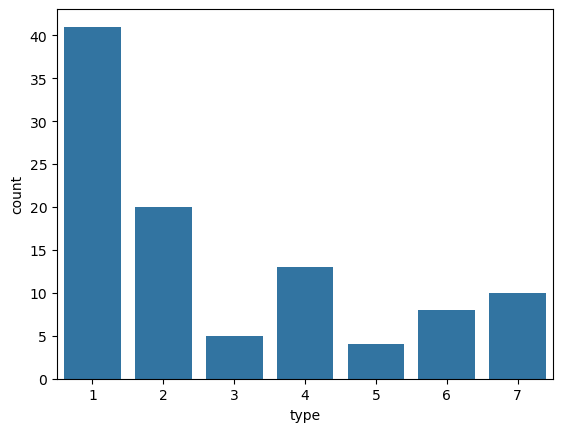

<Figure size 2000x1200 with 0 Axes>

In [55]:
sns.countplot(x='type', data=df)
plt.figure(figsize=(20,12))
plt.show()

In [57]:
# From above graph we can see counts of different animal types. 'Type 1' class has the maximum number of animals, while 'Type 5' has the least number
# of animals. 

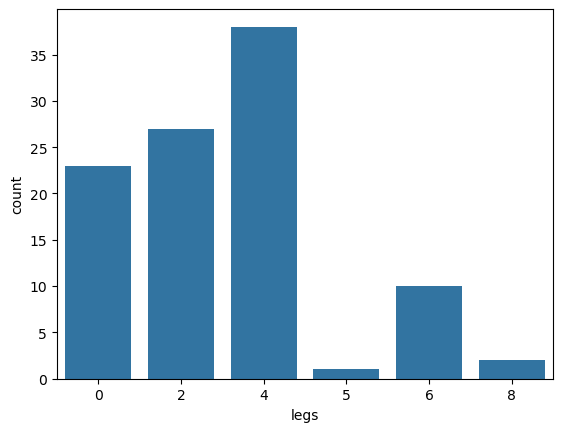

<Figure size 2000x1200 with 0 Axes>

In [59]:
sns.countplot(x='legs', data=df)
plt.figure(figsize=(20,12))
plt.show()

In [61]:
# From above graph we can see counts of different number of legs animals in the zoo have. It is clear from the above plot that most of the animals 
# in the zoo are 4-legged and number of animals with 5 legs is the least. 

In [73]:
# 'Legs' is the only input numerical feature that has different values other than 0 & 1. It's generally not recommended to leave the 'legs' feature
# untreated when it has a different scale compared to other features in the dataset. 

In [75]:
# Creating binary (0/1) dummy variables for each unique value of 'legs' is the most straightforward and safe option as it avoids imposing an 
# ordinal relationship and creates binary features consistent with the rest of the dataset. This is often preferred for KNN, as it treats each 
# leg value as a separate category.

## Data Preprocessing

In [84]:
# Creating binary (0/1) dummy variables for each unique value of 'legs' feature

dummies = pd.get_dummies(df['legs'], prefix='legs', dtype=int)
dummies

,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
96,0,1,0,0,0,0
97,0,0,0,0,1,0
98,0,0,1,0,0,0
99,1,0,0,0,0,0


In [86]:
df = pd.concat([df,dummies], axis=1)
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,antelope,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,0,1,0,0,0
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,0,4,1,0,0,0,0,0
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,boar,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,1,0,0,0,0
97,wasp,1,0,1,0,1,0,0,0,0,...,0,0,0,6,0,0,0,0,1,0
98,wolf,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,7,1,0,0,0,0,0


In [88]:
df['legs'].unique()

array([4, 0, 2, 6, 8, 5], dtype=int64)

In [90]:
# Removing original feature 'legs' 
df.drop(columns=['legs'], inplace=True)

In [92]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,antelope,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,0,1,0,0,0
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,0,4,1,0,0,0,0,0
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,boar,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,1,0,1,1,0,1,0,0,0,0
97,wasp,1,0,1,0,1,0,0,0,0,...,0,0,0,6,0,0,0,0,1,0
98,wolf,1,0,0,1,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,7,1,0,0,0,0,0


In [94]:
# 'animal name' is the only non-numeric feature and can be dropped for further analysis
df.drop(columns=['animal name'], inplace=True)

In [96]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,1,0,0,0,0
97,1,0,1,0,1,0,0,0,0,1,...,0,0,0,6,0,0,0,0,1,0
98,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0
99,0,0,1,0,0,0,0,0,0,1,...,0,0,0,7,1,0,0,0,0,0


In [98]:
# Now we have all numeric input features in the dataset scaled in binary classification 0 & 1. Thus, we can now build our model. 

## Model Building

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [103]:
x = df.drop(columns=['type'])
y = df['type']

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True)

In [107]:
x_train.shape, y_train.shape

((80, 21), (80,))

In [109]:
x_test.shape, y_test.shape

((21, 21), (21,))

In [155]:
# Fit k-nearest neighbors classifier with training sets for k = 6
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [157]:
y_pred = knn.predict(x_test)
y_pred

array([2, 4, 1, 4, 1, 1, 7, 2, 2, 1, 2, 1, 7, 2, 6, 1, 1, 1, 3, 1, 4],
      dtype=int64)

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         0
           7       1.00      0.67      0.80         3

    accuracy                           0.95        21
   macro avg       0.83      0.78      0.80        21
weighted avg       1.00      0.95      0.97        21



In [332]:
# We have already achieved high accuracy rate of 0.95 for n_neighbors = 6, which is a very good accuracy score for predicting test data.

In [163]:
# A higher value of K can reduce the impact of noise but may lead to over-smoothing the decision boundary.
# A lower value of K can be sensitive to outliers and may lead to overfitting.
# It is crucial to find an optimal K value based on the dataset and often using techniques like GridSearchCV. 

## Finding optimum distance metric and value of 'K'

In [166]:
from sklearn.model_selection import GridSearchCV

In [168]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'], # Weighting scheme
    'metric': ['euclidean', 'manhattan'] # Distance metrics
}

In [170]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5,scoring="accuracy")

In [172]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [176]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [178]:
# Applying the best parameters found to KNeighbors model

knn_best_model = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3, weights = 'distance')

In [180]:
knn_best_model.fit(x_train,y_train)
ypr = knn_best_model.predict(x_test)
ypr

array([2, 4, 1, 4, 1, 1, 7, 2, 2, 1, 2, 1, 7, 2, 7, 1, 1, 1, 3, 1, 4],
      dtype=int64)

In [182]:
print(classification_report(y_test,ypr))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [184]:
# Therefore, we achieved 100% accuracy rate for predicting values on test dataset for the following metrics achieved using GridSearchCV: - 

# Distance metric = 'euclidean'
# n_neighbors (K) = 3
# weighing scheme = 'distance'

In [186]:
# A 100% accuracy rate in a classification report implies that our model has correctly classified all data points in the evaluation set. This means
# there are no false positives or false negatives. Every prediction made by the model aligns perfectly with the actual labels.

## Visualizing model's performance

In [188]:
from sklearn.model_selection import cross_val_score

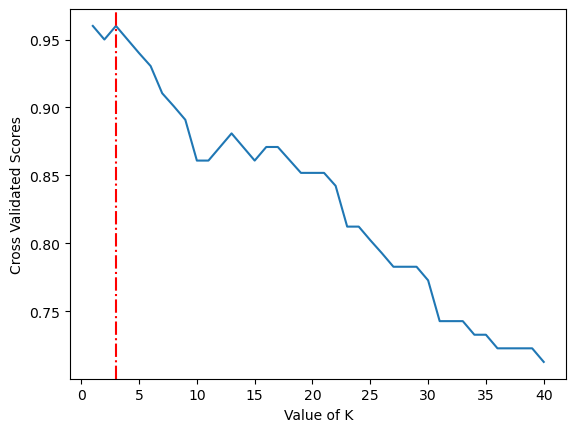

In [197]:
k_range = range(1,41)
k_scores = []

for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(KNN,x,y,cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range,k_scores)
plt.xlabel('Value of K')
plt.ylabel('Cross Validated Scores')
plt.axvline(x=3, linestyle = '-.', color = 'red')
plt.show()

In [193]:
# This graph verifies that optimum value of 'K' = 3 to achieve the highest validation scores. 

## Visualizing decision boundaries

In [262]:
from mlxtend.plotting import plot_decision_regions

In [266]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,tail,domestic,catsize,type,legs_0,legs_2,legs_4,legs_5,legs_6,legs_8
0,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
1,1,0,0,1,0,0,0,1,1,1,...,1,0,1,1,0,0,1,0,0,0
2,0,0,1,0,0,1,1,1,1,0,...,1,0,0,4,1,0,0,0,0,0
3,1,0,0,1,0,0,1,1,1,1,...,0,0,1,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,1,1,1,...,1,0,1,1,0,0,1,0,0,0


In [307]:
X = df[['airborne','aquatic']]
Y = df['type']

In [309]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

In [311]:
X_train.shape, Y_train.shape

((80, 2), (80,))

In [313]:
X_test.shape, Y_test.shape

((21, 2), (21,))

In [334]:
knn_decision_boundaries = KNeighborsClassifier(n_neighbors=5)
knn_decision_boundaries.fit(X_train,Y_train)

KNeighborsClassifier()

In [336]:
predictions = knn_decision_boundaries.predict(X_test)
predictions

array([2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1],
      dtype=int64)

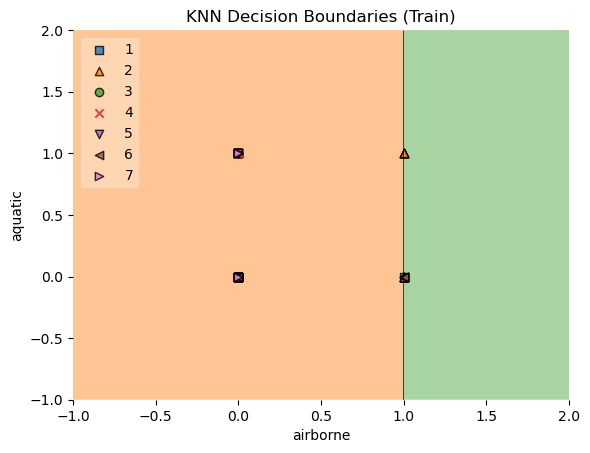

In [338]:
# Plot decision boundaries for Train set

plot_decision_regions(X_train.values,Y_train.values,clf=knn_decision_boundaries,legend=2)
plt.xlabel('airborne')
plt.ylabel('aquatic') 
plt.title('KNN Decision Boundaries (Train)') 
plt.show()

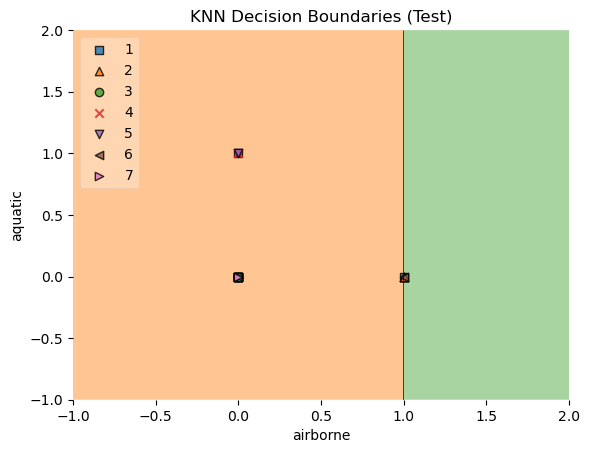

In [339]:
# Plot decision boundaries for Test set

plot_decision_regions(X_test.values,Y_test.values,clf=knn_decision_boundaries,legend=2)
plt.xlabel('airborne')
plt.ylabel('aquatic') 
plt.title('KNN Decision Boundaries (Test)') 
plt.show()

In [323]:
## INTERPRETATION OF DECISION BOUNDARIES: - 

# If the boundaries are mostly linear and well-separated (as in our case) it suggests that the model can effectively classify data points based on 
# simple combinations of the binary features.
# Each enclosed area created by the decision boundaries represents a decision region. Data points falling within a specific decision region will be
# assigned the corresponding class label.
# Overlapping decision regions or unclear boundaries suggest potential difficulty in separating certain classes. This indicates areas where the model 
# might be prone to misclassification. It's important to analyze these areas to understand the limitations of the model and potential sources of error.